In [1]:
import pandas as pd 

In [2]:
# age
# sex
# chest pain type (4 values)
# resting blood pressure
# serum cholestoral in mg/dl
# fasting blood sugar > 120 mg/dl
# resting electrocardiographic results (values 0,1,2)
# maximum heart rate achieved
# exercise induced angina
# oldpeak = ST depression induced by exercise relative to rest
# the slope of the peak exercise ST segment
# number of major vessels (0-3) colored by flourosopy
# thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [3]:
df= pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model= DecisionTreeClassifier(max_depth=6)

In [28]:
# independent and dependent variable 

In [29]:
x= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=40)

In [32]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [33]:
y_pred= model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_pred)

0.9123376623376623

In [36]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, accuracy_score, f1_score

In [37]:
confusion_matrix(y_test, y_pred)

array([[143,  10],
       [ 17, 138]], dtype=int64)

In [38]:
recall_score(y_test, y_pred)

0.8903225806451613

In [39]:
from sklearn import tree

In [40]:
import  matplotlib.pyplot as plt

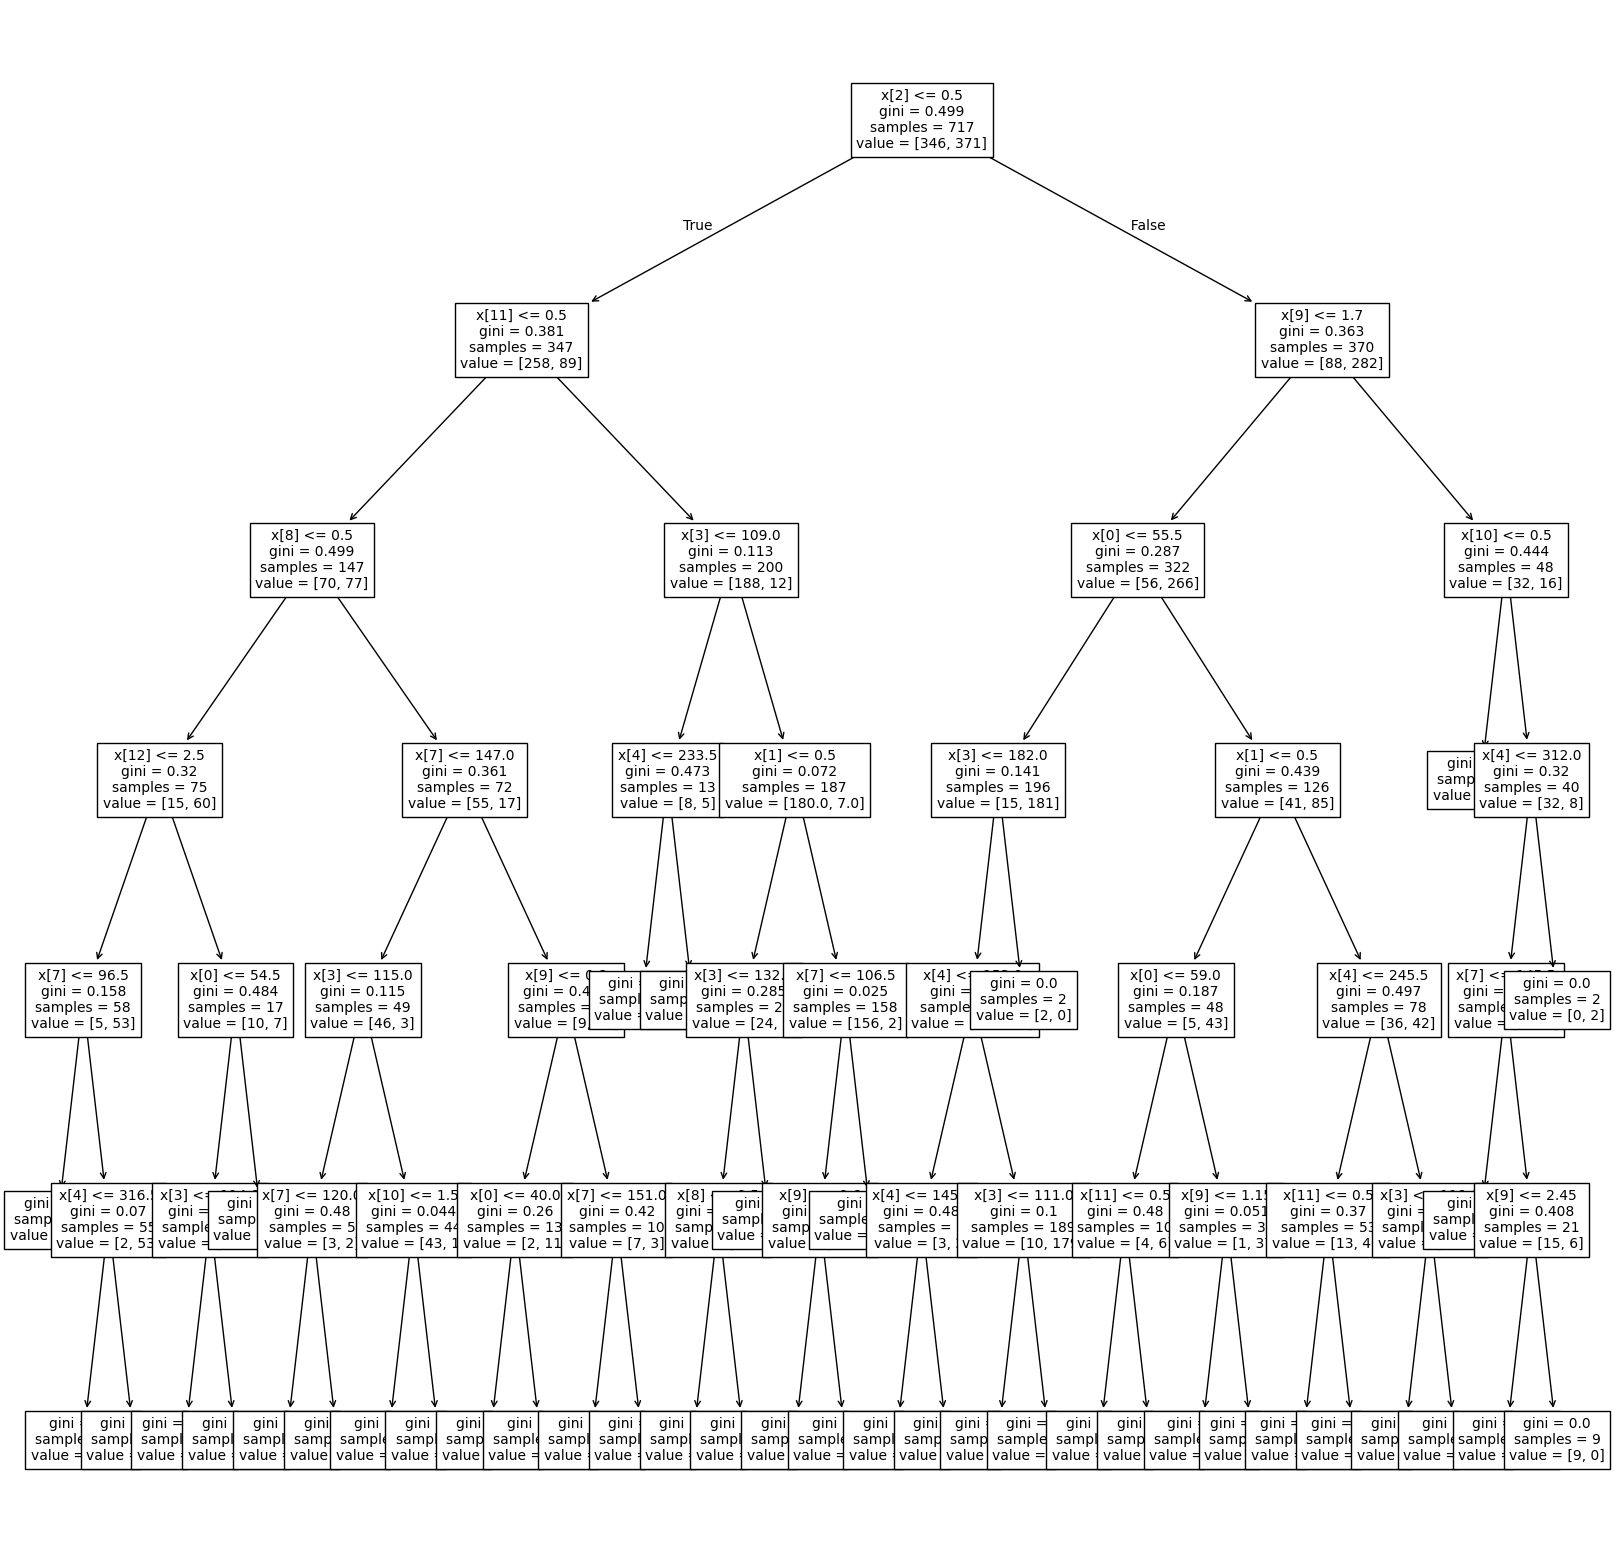

In [41]:
plt.figure(figsize=(20,20))
plt.show(tree.plot_tree(model,fontsize=10))

In [42]:
from sklearn.model_selection import GridSearchCV

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
tree= DecisionTreeClassifier()

In [55]:
params={
    'max_depth':[4,5,6,7,8,9,10,11,12,13,14,15,16],
    'criterion':['gini','entropy']
}

In [56]:
cv= GridSearchCV(tree,param_grid=params, scoring='accuracy')

In [59]:
cv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16]},
             scoring='accuracy')

In [60]:
cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [61]:
cv.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16]},
             scoring='accuracy')>

In [62]:
tree= DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [63]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
y_pred= tree.predict(x_test)

In [ ]:
recall_score(y_test, y_pred)

0.9806451612903225

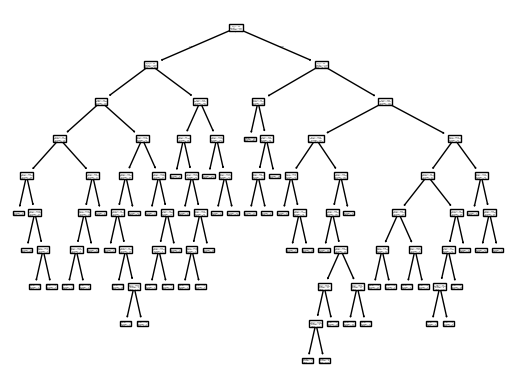

In [68]:
plt.show(plot_tree(tree))